In [1]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline

cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For Reproducibility
torch.manual_seed(1)

if cuda:
    torch.cuda.manual_seed(1)
print(torch.cuda.get_device_name(0))

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

CUDA Available? True
Tesla P100-PCIE-16GB


CUDA Available? True
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


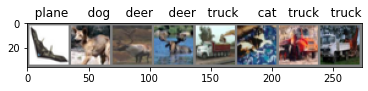

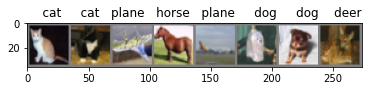

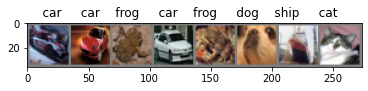

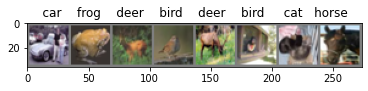

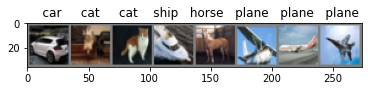

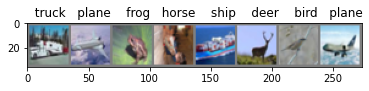

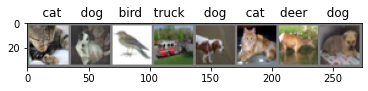

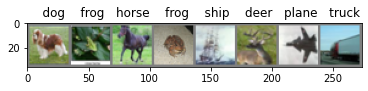

In [3]:
import data
train_loader, test_loader = data.loader(128)
data.display()

In [0]:
import model as m

In [4]:
!pip install torchsummary
import summary
summary.summ(device)

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
       BatchNorm2d-2           [-1, 32, 32, 32]              64
              ReLU-3           [-1, 32, 32, 32]               0
         Dropout2d-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           9,216
       BatchNorm2d-6           [-1, 32, 32, 32]              64
              ReLU-7           [-1, 32, 32, 32]               0
         Dropout2d-8           [-1, 32, 32, 32]               0
            Conv2d-9           [-1, 32, 32, 32]           9,216
      BatchNorm2d-10           [-1, 32, 32, 32]              64
             ReLU-11           [-1, 32, 32, 32]               0
        Dropout2d-12           [-1, 32, 32, 32]               0
        MaxPool2d-13           [-1, 32, 16, 16]               0
           Conv2d-14           [-1

In [0]:
import train as tr
import test as te

In [6]:
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

model = m.Net(True).to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-5)
#scheduler = StepLR(optimizer, step_size= 10, gamma= 0.1)
epochs = 3

for epoch in range(epochs):
  print('EPOCH: ', epoch+1)
  tr.train(model, device, train_loader, optimizer, epoch)
  #scheduler.step()
  te.test(model, device, test_loader)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH:  1


Loss=1.6074135303497314 Batch_id=390 Accuracy=32.25: 100%|██████████| 391/391 [00:13<00:00, 28.55it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.4286, Accuracy: 4715/10000 (47.15%)

EPOCH:  2


Loss=1.24623703956604 Batch_id=390 Accuracy=45.82: 100%|██████████| 391/391 [00:13<00:00, 28.49it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.2034, Accuracy: 5726/10000 (57.26%)

EPOCH:  3


Loss=1.2261840105056763 Batch_id=390 Accuracy=53.54: 100%|██████████| 391/391 [00:13<00:00, 28.74it/s]



Test set: Average loss: 1.0324, Accuracy: 6316/10000 (63.16%)




Test set: Average loss: 1.0324, Accuracy: 6316/10000 (63.16%)

(3684, 32, 32, 3)


<Figure size 432x288 with 0 Axes>

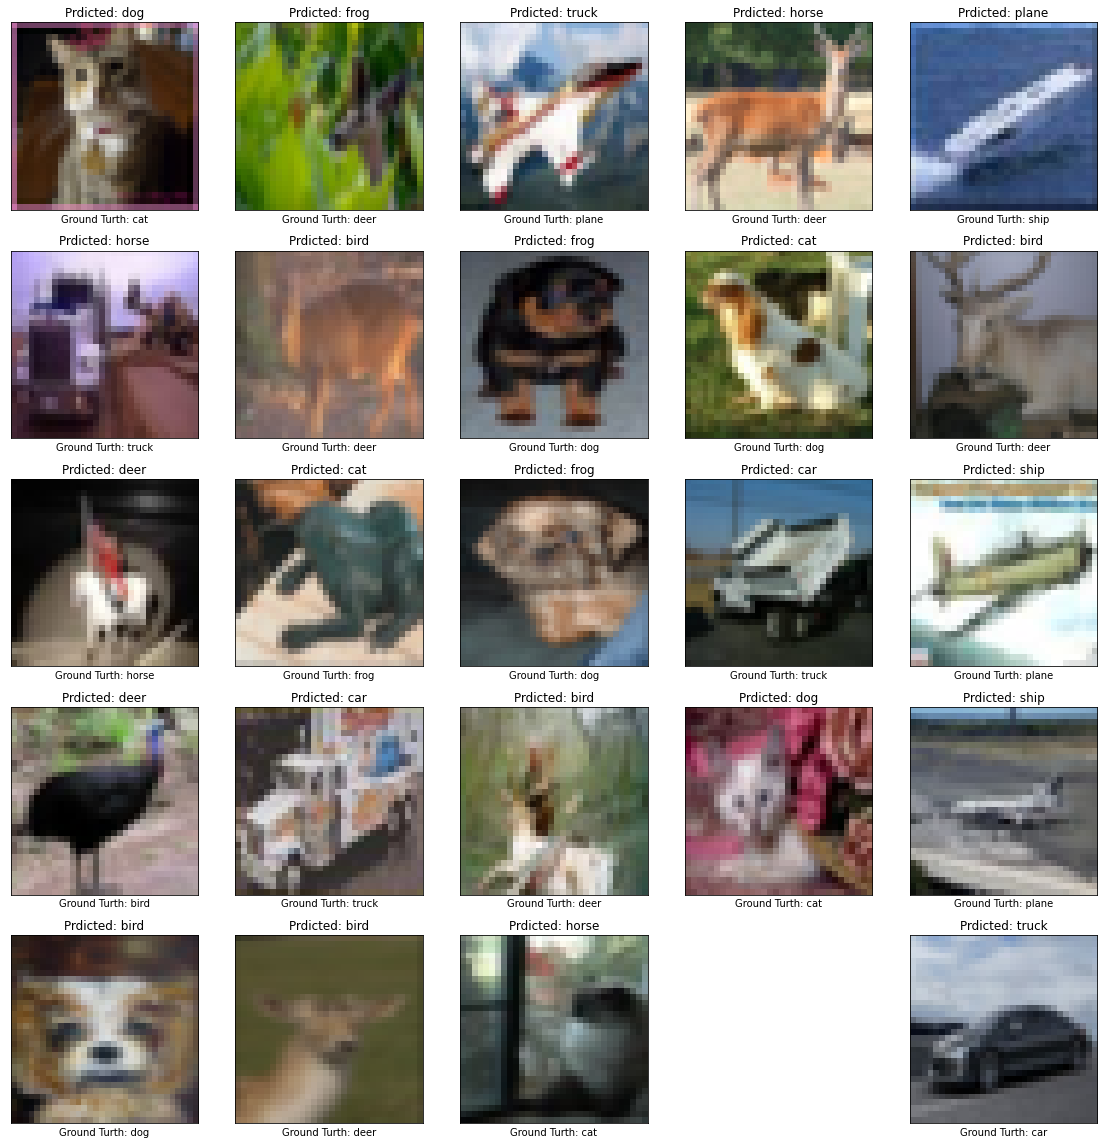

In [8]:
import utilis as ut
path = 'savedmodel/classifier.pt'
saved_model = m.Net(gbn= True).to(device)
saved_model.load_state_dict(torch.load(path))
saved_model.eval()
ut.mis(saved_model, device, test_loader, 25)

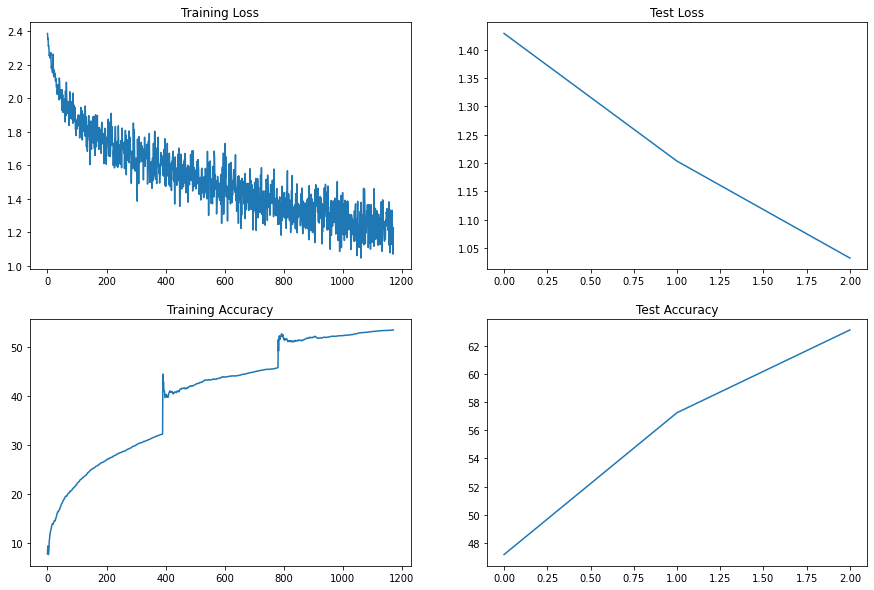

In [9]:
ut.graph()

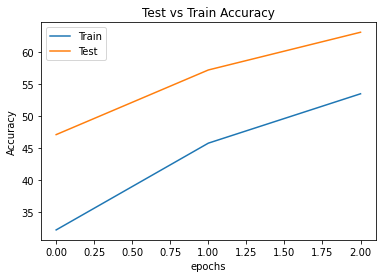

In [10]:
ut.testvtrain()